In [21]:
# Masoud Pourghavam
# Student Number: 810601044
# Course: Artificial Intelligence
# University of Tehran
# Homework 4

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
from google.colab import drive
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import mean_absolute_error,mean_squared_error, explained_variance_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [23]:
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
file_dir = "/content/drive/MyDrive/houses_1.csv"
df = pd.read_csv(file_dir)

In [25]:
# Rows and columns report
num_rows, num_cols = df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 21613
Number of columns: 21


<ipython-input-26-e0e5843a72f4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


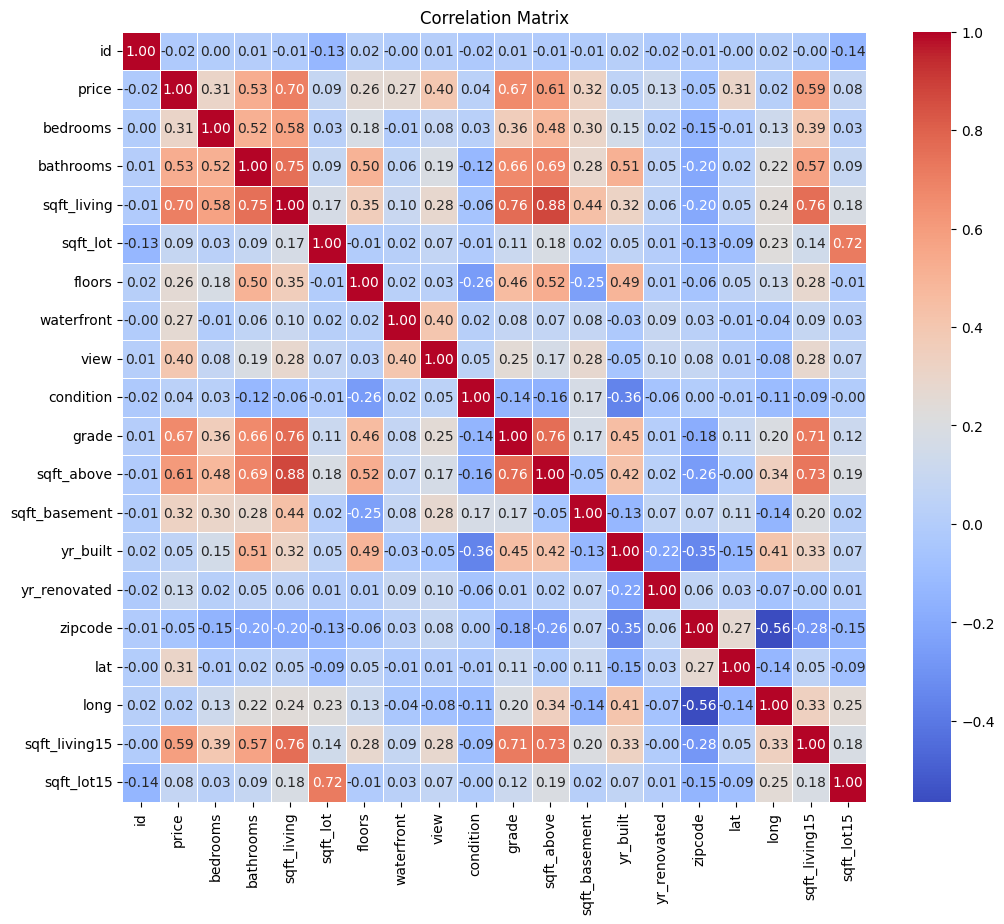

In [26]:
# Correalation matirx
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

<ipython-input-27-f912a59fa73b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

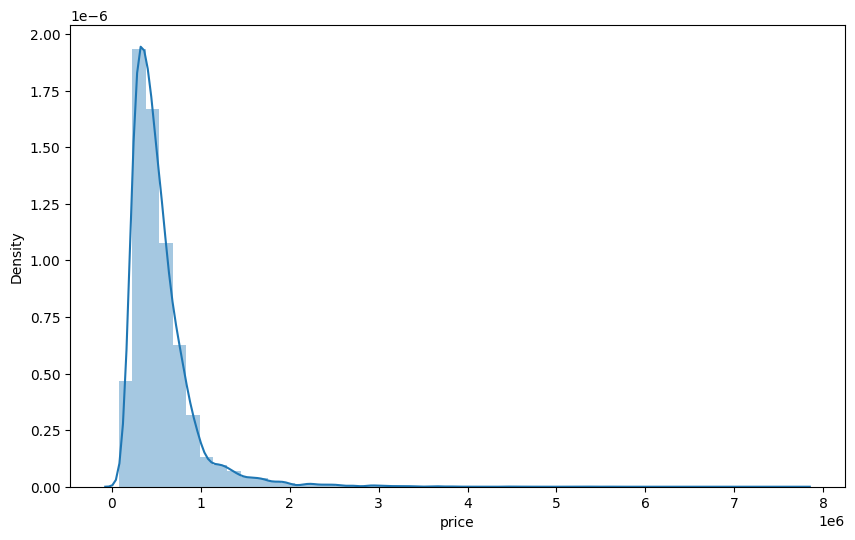

In [27]:
# Distribution of price
plt.figure(figsize=(10,6))
sns.distplot(df['price'])

In [28]:
# Transform 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract year and month from the 'date' column
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Delete the 'date' column
df = df.drop('date', axis=1)

In [29]:
# Print the updated dataset
print(df.head())

           id     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7129300520  221900.0         3       1.00         1180      5650     1.0   
1  6414100192  538000.0         3       2.25         2570      7242     2.0   
2  5631500400  180000.0         2       1.00          770     10000     1.0   
3  2487200875  604000.0         4       3.00         1960      5000     1.0   
4  1954400510  510000.0         3       2.00         1680      8080     1.0   

   waterfront  view  condition  ...  sqft_basement  yr_built  yr_renovated  \
0           0     0          3  ...              0      1955             0   
1           0     0          3  ...            400      1951          1991   
2           0     0          3  ...              0      1933             0   
3           0     0          5  ...            910      1965             0   
4           0     0          3  ...              0      1987             0   

   zipcode      lat     long  sqft_living15  sqft_lot15 

In [30]:
# Separate input (X) and output (y) columns
X = df.drop('price', axis=1)  # Drop 'price' column from the DataFrame to get input columns
y = df['price']  # Select 'price' column as the output column
# Print the input (X) and output (y) shapes
print("Input (X) shape:", X.shape)
print("Output (y) shape:", y.shape)

Input (X) shape: (21613, 21)
Output (y) shape: (21613,)


In [31]:
# Find the highest and lowest prices
highest_price = df['price'].max()
lowest_price = df['price'].min()
# Print the highest and lowest prices
print("Highest Price:", highest_price)
print("Lowest Price:", lowest_price)

Highest Price: 7700000.0
Lowest Price: 75000.0


In [32]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Perform scaling only on the training set
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same scaling on the testing set
X_test_scaled = scaler.transform(X_test)

# Print the shapes of the scaled training and testing sets
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)

X_train_scaled shape: (17290, 21)
X_test_scaled shape: (4323, 21)


In [34]:
'''
#################### Lr = 0.001 and Epochs = 20 ####################

# Build the MLP model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))  # Input layer
model.add(Dense(32, activation='relu'))  # Hidden layer 1
model.add(Dense(16, activation='relu'))  # Hidden layer 2
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.001, clipvalue=5),
              loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, 
                    batch_size=64, 
                    epochs=20, 
                    validation_data=(X_test_scaled, y_test))


# Get the training and validation loss from the history
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the loss and validation loss over the number of epochs
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss and Validation Loss for lr=0.001 and epoch=20')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Make predictions on the training and testing data
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Calculate metrics for training data
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = explained_variance_score(y_train, y_train_pred)

# Visualize the scatter plot of original and predicted values
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.plot(y_train,y_train,'r')
plt.title('y_train for lr=0.001 and epoch=20')
plt.xlabel('Original Values')
plt.ylabel('Predicted Values')
plt.show()

# Print the metrics
print("Train Metrics:")
print("MAE:", train_mae)
print("MSE:", train_mse)
print("R^2:", train_r2)

# Calculate metrics for testing data
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = explained_variance_score(y_test, y_test_pred)

# Visualize the scatter plot of original and predicted values
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot(y_test,y_test,'r')
plt.title('y_test for lr=0.001 and epoch=20')
plt.xlabel('Original Values')
plt.ylabel('Predicted Values')
plt.show()

print("Test Metrics:")
print("MAE:", test_mae)
print("MSE:", test_mse)
print("R^2:", test_r2)

'''


'\n#################### Lr = 0.001 and Epochs = 20 ####################\n\n# Build the MLP model\nmodel = Sequential()\nmodel.add(Dense(64, activation=\'relu\', input_shape=(X_train_scaled.shape[1],)))  # Input layer\nmodel.add(Dense(32, activation=\'relu\'))  # Hidden layer 1\nmodel.add(Dense(16, activation=\'relu\'))  # Hidden layer 2\nmodel.add(Dense(1))  # Output layer\n\n# Compile the model\nmodel.compile(optimizer=SGD(learning_rate=0.001, clipvalue=5),\n              loss=\'mean_squared_error\')\n\n# Train the model\nhistory = model.fit(X_train_scaled, y_train, \n                    batch_size=64, \n                    epochs=20, \n                    validation_data=(X_test_scaled, y_test))\n\n\n# Get the training and validation loss from the history\nloss = history.history[\'loss\']\nval_loss = history.history[\'val_loss\']\n\n# Plot the loss and validation loss over the number of epochs\nepochs = range(1, len(loss) + 1)\n\nplt.plot(epochs, loss, \'b\', label=\'Loss\')\nplt.plo

In [35]:
'''
#################### Lr = 0.1 and Epochs = 20 ####################

# Build the MLP model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))  # Input layer
model.add(Dense(32, activation='relu'))  # Hidden layer 1
model.add(Dense(16, activation='relu'))  # Hidden layer 2
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.1, clipvalue=0.3),
              loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train,
                    batch_size=64, 
                    epochs=20, 
                    validation_data=(X_test_scaled, y_test))


# Get the training and validation loss from the history
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the loss and validation loss over the number of epochs
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss and Validation Loss for lr=0.1 and epoch=20')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Make predictions on the training and testing data
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Calculate metrics for training data
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = explained_variance_score(y_train, y_train_pred)

# Visualize the scatter plot of original and predicted values
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.plot(y_train,y_train,'r')
plt.title('y_train for lr=0.1 and epoch=20')
plt.xlabel('Original Values')
plt.ylabel('Predicted Values')
plt.show()

# Print the metrics
print("Train Metrics:")
print("MAE:", train_mae)
print("MSE:", train_mse)
print("R^2:", train_r2)


# Calculate metrics for testing data
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = explained_variance_score(y_test, y_test_pred)

# Visualize the scatter plot of original and predicted values
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot(y_test,y_test,'r')
plt.title('y_test for lr=0.1 and epoch=20')
plt.xlabel('Original Values')
plt.ylabel('Predicted Values')
plt.show()

print("Test Metrics:")
print("MAE:", test_mae)
print("MSE:", test_mse)
print("R^2:", test_r2)



'''

'\n#################### Lr = 0.1 and Epochs = 20 ####################\n\n# Build the MLP model\nmodel = Sequential()\nmodel.add(Dense(64, activation=\'relu\', input_shape=(X_train_scaled.shape[1],)))  # Input layer\nmodel.add(Dense(32, activation=\'relu\'))  # Hidden layer 1\nmodel.add(Dense(16, activation=\'relu\'))  # Hidden layer 2\nmodel.add(Dense(1))  # Output layer\n\n# Compile the model\nmodel.compile(optimizer=SGD(learning_rate=0.1, clipvalue=0.3),\n              loss=\'mean_squared_error\')\n\n# Train the model\nhistory = model.fit(X_train_scaled, y_train,\n                    batch_size=64, \n                    epochs=20, \n                    validation_data=(X_test_scaled, y_test))\n\n\n# Get the training and validation loss from the history\nloss = history.history[\'loss\']\nval_loss = history.history[\'val_loss\']\n\n# Plot the loss and validation loss over the number of epochs\nepochs = range(1, len(loss) + 1)\n\nplt.plot(epochs, loss, \'b\', label=\'Loss\')\nplt.plot(e

In [36]:
'''

#################### Lr = 0.001 and Epochs = 4000 ####################

# Build the MLP model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))  # Input layer
model.add(Dense(32, activation='relu'))  # Hidden layer 1
model.add(Dense(16, activation='relu'))  # Hidden layer 2
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.001, clipvalue=1.0),
              loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, 
                    batch_size=64, 
                    epochs=4000, 
                    validation_data=(X_test_scaled, y_test))


# Get the training and validation loss from the history
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the loss and validation loss over the number of epochs
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss and Validation Loss for lr=0.001 and epoch=4000')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Make predictions on the training and testing data
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Calculate metrics for training data
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = explained_variance_score(y_train, y_train_pred)

# Visualize the scatter plot of original and predicted values
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.plot(y_train,y_train,'r')
plt.title('y_train for lr=0.001 and epoch=4000')
plt.xlabel('Original Values')
plt.ylabel('Predicted Values')
plt.show()

# Print the metrics
print("Train Metrics:")
print("MAE:", train_mae)
print("MSE:", train_mse)
print("R^2:", train_r2)


# Calculate metrics for testing data
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = explained_variance_score(y_test, y_test_pred)

# Visualize the scatter plot of original and predicted values
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot(y_test,y_test,'r')
plt.title('y_test for lr=0.001 and epoch=4000')
plt.xlabel('Original Values')
plt.ylabel('Predicted Values')
plt.show()

print("Test Metrics:")
print("MAE:", test_mae)
print("MSE:", test_mse)
print("R^2:", test_r2)



# Convert predicted values into binary classes based on a threshold
threshold = 0.5

y_test_pred_binary = np.where(y_test_pred >= threshold, 1, 0)

# Create the confusion matrix for testing data
test_confusion_matrix = confusion_matrix(y_test, y_test_pred_binary)

# Print the confusion matrix for testing data
print("Confusion Matrix for Testing Data:")
print(test_confusion_matrix)

'''

'\n\n#################### Lr = 0.001 and Epochs = 4000 ####################\n\n# Build the MLP model\nmodel = Sequential()\nmodel.add(Dense(64, activation=\'relu\', input_shape=(X_train_scaled.shape[1],)))  # Input layer\nmodel.add(Dense(32, activation=\'relu\'))  # Hidden layer 1\nmodel.add(Dense(16, activation=\'relu\'))  # Hidden layer 2\nmodel.add(Dense(1))  # Output layer\n\n# Compile the model\nmodel.compile(optimizer=SGD(learning_rate=0.001, clipvalue=1.0),\n              loss=\'mean_squared_error\')\n\n# Train the model\nhistory = model.fit(X_train_scaled, y_train, \n                    batch_size=64, \n                    epochs=4000, \n                    validation_data=(X_test_scaled, y_test))\n\n\n# Get the training and validation loss from the history\nloss = history.history[\'loss\']\nval_loss = history.history[\'val_loss\']\n\n# Plot the loss and validation loss over the number of epochs\nepochs = range(1, len(loss) + 1)\n\nplt.plot(epochs, loss, \'b\', label=\'Loss\')\

In [37]:
'''
#################### Lr = 0.1 and Epochs = 4000 ####################

# Build the MLP model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))  # Input layer
model.add(Dense(32, activation='relu'))  # Hidden layer 1
model.add(Dense(16, activation='relu'))  # Hidden layer 2
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.1, clipvalue=0.01),
              loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, 
                    batch_size=64, 
                    epochs=4000, 
                    validation_data=(X_test_scaled, y_test))


# Get the training and validation loss from the history
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the loss and validation loss over the number of epochs
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss and Validation Loss for lr=0.1 and epoch=4000')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Make predictions on the training and testing data
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Calculate metrics for training data
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = explained_variance_score(y_train, y_train_pred)

# Visualize the scatter plot of original and predicted values
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.plot(y_train,y_train,'r')
plt.title('y_train for lr=0.1 and epoch=4000')
plt.xlabel('Original Values')
plt.ylabel('Predicted Values')
plt.show()

# Print the metrics
print("Train Metrics:")
print("MAE:", train_mae)
print("MSE:", train_mse)
print("R^2:", train_r2)


# Calculate metrics for testing data
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = explained_variance_score(y_test, y_test_pred)

# Visualize the scatter plot of original and predicted values
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot(y_test,y_test,'r')
plt.title('y_test for lr=0.1 and epoch=4000')
plt.xlabel('Original Values')
plt.ylabel('Predicted Values')
plt.show()

print("Test Metrics:")
print("MAE:", test_mae)
print("MSE:", test_mse)
print("R^2:", test_r2)


'''

'\n#################### Lr = 0.1 and Epochs = 4000 ####################\n\n# Build the MLP model\nmodel = Sequential()\nmodel.add(Dense(64, activation=\'relu\', input_shape=(X_train_scaled.shape[1],)))  # Input layer\nmodel.add(Dense(32, activation=\'relu\'))  # Hidden layer 1\nmodel.add(Dense(16, activation=\'relu\'))  # Hidden layer 2\nmodel.add(Dense(1))  # Output layer\n\n# Compile the model\nmodel.compile(optimizer=SGD(learning_rate=0.1, clipvalue=0.01),\n              loss=\'mean_squared_error\')\n\n# Train the model\nhistory = model.fit(X_train_scaled, y_train, \n                    batch_size=64, \n                    epochs=4000, \n                    validation_data=(X_test_scaled, y_test))\n\n\n# Get the training and validation loss from the history\nloss = history.history[\'loss\']\nval_loss = history.history[\'val_loss\']\n\n# Plot the loss and validation loss over the number of epochs\nepochs = range(1, len(loss) + 1)\n\nplt.plot(epochs, loss, \'b\', label=\'Loss\')\nplt.

In [38]:
'''

#################### Lr = 0.001 and Epochs = 4000 with Tanh ####################

# Normalize the output labels to the range of Tanh function (-1 to 1)
y_train_normalized = (y_train - y_train.min()) / (y_train.max() - y_train.min()) * 2 - 1
y_test_normalized = (y_test - y_test.min()) / (y_test.max() - y_test.min()) * 2 - 1

# Build the MLP model
model = Sequential()
model.add(Dense(64, activation='tanh', input_shape=(X_train_scaled.shape[1],)))  # Input layer
model.add(Dense(32, activation='tanh'))  # Hidden layer 1
model.add(Dense(16, activation='tanh'))  # Hidden layer 2
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.001, clipvalue=-5),
              loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train_normalized, 
                    batch_size=64, 
                    epochs=4000,
                    validation_data=(X_test_scaled, y_test_normalized))

# Get the training and validation loss from the history
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the loss and validation loss over the number of epochs
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss and Validation Loss for lr=0.001 and Tanh')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions on the training and testing data
y_train_pred_normalized = model.predict(X_train_scaled)
y_test_pred_normalized = model.predict(X_test_scaled)

# Denormalize the predicted values
y_train_pred = (y_train_pred_normalized + 1) / 2 * (y_train.max() - y_train.min()) + y_train.min()
y_test_pred = (y_test_pred_normalized + 1) / 2 * (y_test.max() - y_test.min()) + y_test.min()

# Calculate metrics for training data
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = explained_variance_score(y_train, y_train_pred)

# Visualize the scatter plot of original and predicted values
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.plot(y_train, y_train, 'r')
plt.title('y_train for lr=0.001 and Tanh')
plt.xlabel('Original Values')
plt.ylabel('Predicted Values')
plt.show()

# Print the metrics
print("Train Metrics:")
print("MAE:", train_mae)
print("MSE:", train_mse)
print("R^2:", train_r2)

# Calculate metrics for testing data
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = explained_variance_score(y_test, y_test_pred)

# Visualize the scatter plot of original and predicted values
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot(y_test, y_test, 'r')
plt.title('y_test for lr=0.001 and Tanh')
plt.xlabel('Original Values')
plt.ylabel('Predicted Values')
plt.show()

print("Test Metrics:")
print("MAE:", test_mae)
print("MSE:", test_mse)
print("R^2:", test_r2)

'''

'\n\n#################### Lr = 0.001 and Epochs = 4000 with Tanh ####################\n\n# Normalize the output labels to the range of Tanh function (-1 to 1)\ny_train_normalized = (y_train - y_train.min()) / (y_train.max() - y_train.min()) * 2 - 1\ny_test_normalized = (y_test - y_test.min()) / (y_test.max() - y_test.min()) * 2 - 1\n\n# Build the MLP model\nmodel = Sequential()\nmodel.add(Dense(64, activation=\'tanh\', input_shape=(X_train_scaled.shape[1],)))  # Input layer\nmodel.add(Dense(32, activation=\'tanh\'))  # Hidden layer 1\nmodel.add(Dense(16, activation=\'tanh\'))  # Hidden layer 2\nmodel.add(Dense(1))  # Output layer\n\n# Compile the model\nmodel.compile(optimizer=SGD(learning_rate=0.001, clipvalue=-5),\n              loss=\'mean_squared_error\')\n\n# Train the model\nhistory = model.fit(X_train_scaled, y_train_normalized, \n                    batch_size=64, \n                    epochs=4000,\n                    validation_data=(X_test_scaled, y_test_normalized))\n\n# Ge

In [39]:
'''
#################### Lr = 0.001 and Epochs = 20 with batch = 1 ####################

# Build the MLP model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))  # Input layer
model.add(Dense(32, activation='relu'))  # Hidden layer 1
model.add(Dense(16, activation='relu'))  # Hidden layer 2
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.001, clipvalue=1.0),
              loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, 
                    batch_size=1, 
                    epochs=20, 
                    validation_data=(X_test_scaled, y_test))


# Get the training and validation loss from the history
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the loss and validation loss over the number of epochs
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss and Validation Loss for lr=0.001 and batch=1')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Make predictions on the training and testing data
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Calculate metrics for training data
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = explained_variance_score(y_train, y_train_pred)

# Visualize the scatter plot of original and predicted values
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.plot(y_train,y_train,'r')
plt.title('y_train for lr=0.001 and batch=1')
plt.xlabel('Original Values')
plt.ylabel('Predicted Values')
plt.show()

# Print the metrics
print("Train Metrics:")
print("MAE:", train_mae)
print("MSE:", train_mse)
print("R^2:", train_r2)


# Calculate metrics for testing data
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = explained_variance_score(y_test, y_test_pred)

# Visualize the scatter plot of original and predicted values
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot(y_test,y_test,'r')
plt.title('y_test for lr=0.001 and epoch=4000 and batch=1')
plt.xlabel('Original Values')
plt.ylabel('Predicted Values')
plt.show()

print("Test Metrics:")
print("MAE:", test_mae)
print("MSE:", test_mse)
print("R^2:", test_r2)


'''

'\n#################### Lr = 0.001 and Epochs = 20 with batch = 1 ####################\n\n# Build the MLP model\nmodel = Sequential()\nmodel.add(Dense(64, activation=\'relu\', input_shape=(X_train_scaled.shape[1],)))  # Input layer\nmodel.add(Dense(32, activation=\'relu\'))  # Hidden layer 1\nmodel.add(Dense(16, activation=\'relu\'))  # Hidden layer 2\nmodel.add(Dense(1))  # Output layer\n\n# Compile the model\nmodel.compile(optimizer=SGD(learning_rate=0.001, clipvalue=1.0),\n              loss=\'mean_squared_error\')\n\n# Train the model\nhistory = model.fit(X_train_scaled, y_train, \n                    batch_size=1, \n                    epochs=20, \n                    validation_data=(X_test_scaled, y_test))\n\n\n# Get the training and validation loss from the history\nloss = history.history[\'loss\']\nval_loss = history.history[\'val_loss\']\n\n# Plot the loss and validation loss over the number of epochs\nepochs = range(1, len(loss) + 1)\n\nplt.plot(epochs, loss, \'b\', label=\'

Epoch 1/400
68/68 [==============================] - 1s 4ms/step - loss: 419483484160.0000 - val_loss: 451294560256.0000
Epoch 2/400
68/68 [==============================] - 0s 3ms/step - loss: 412285272064.0000 - val_loss: 433984274432.0000
Epoch 3/400
68/68 [==============================] - 0s 2ms/step - loss: 377140215808.0000 - val_loss: 372760641536.0000
Epoch 4/400
68/68 [==============================] - 0s 2ms/step - loss: 287759302656.0000 - val_loss: 247880826880.0000
Epoch 5/400
68/68 [==============================] - 0s 2ms/step - loss: 157374382080.0000 - val_loss: 122863435776.0000
Epoch 6/400
68/68 [==============================] - 0s 2ms/step - loss: 100054614016.0000 - val_loss: 112751337472.0000
Epoch 7/400
68/68 [==============================] - 0s 2ms/step - loss: 95031779328.0000 - val_loss: 106823966720.0000
Epoch 8/400
68/68 [==============================] - 0s 2ms/step - loss: 89788743680.0000 - val_loss: 100566867968.0000
Epoch 9/400
68/68 [===============

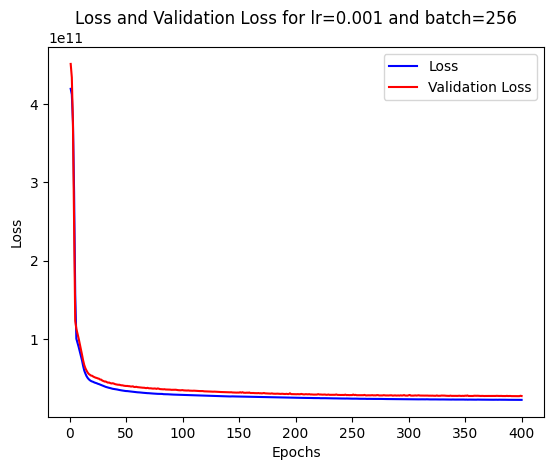

136/136 [==============================] - 0s 1ms/step


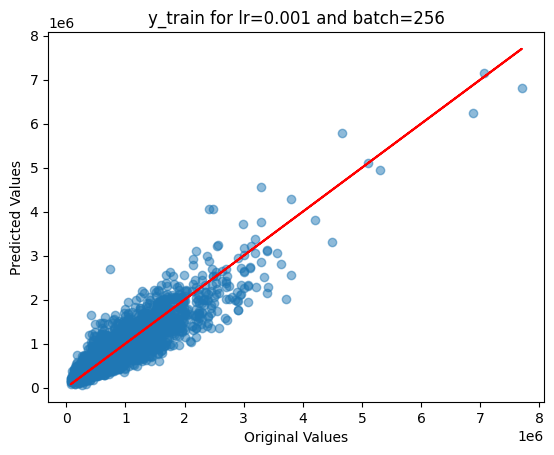

Train Metrics:
MAE: 94418.67468460815
MSE: 21906303562.41892
R^2: 0.8332010285070206


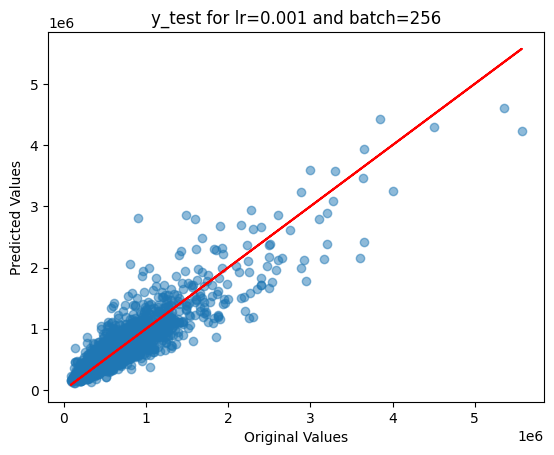

Test Metrics:
MAE: 100718.48344971663
MSE: 26817742937.681026
R^2: 0.8230549621132991


In [40]:
#################### Lr = 0.001 and Epochs = 400 with batch = 256 ####################

# Build the MLP model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))  # Input layer
model.add(Dense(32, activation='relu'))  # Hidden layer 1
model.add(Dense(16, activation='relu'))  # Hidden layer 2
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.001, clipvalue=5),
              loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, 
                    batch_size=256, 
                    epochs=400, 
                    validation_data=(X_test_scaled, y_test))


# Get the training and validation loss from the history
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the loss and validation loss over the number of epochs
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss and Validation Loss for lr=0.001 and batch=256')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Make predictions on the training and testing data
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Calculate metrics for training data
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = explained_variance_score(y_train, y_train_pred)

# Visualize the scatter plot of original and predicted values
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.plot(y_train,y_train,'r')
plt.title('y_train for lr=0.001 and batch=256')
plt.xlabel('Original Values')
plt.ylabel('Predicted Values')
plt.show()

# Print the metrics
print("Train Metrics:")
print("MAE:", train_mae)
print("MSE:", train_mse)
print("R^2:", train_r2)


# Calculate metrics for testing data
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = explained_variance_score(y_test, y_test_pred)

# Visualize the scatter plot of original and predicted values
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot(y_test,y_test,'r')
plt.title('y_test for lr=0.001 and batch=256')
plt.xlabel('Original Values')
plt.ylabel('Predicted Values')
plt.show()

print("Test Metrics:")
print("MAE:", test_mae)
print("MSE:", test_mse)
print("R^2:", test_r2)

